In [2]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [15]:
secretnumber = '101001'

In [16]:
n = len(secretnumber)
circuit = QuantumCircuit(n+1,n)
#circuit.h([0,1,2,3,4,5])
circuit.h(range(n))
circuit.x(n)
circuit.h(n)
circuit.barrier()

for ii,yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii,n)
# circuit.cx(5,6)
# circuit.cx(3,6)
# circuit.cx(0,6)
circuit.barrier()
circuit.h(range(n))
circuit.barrier()
circuit.measure(range(n),range(n))

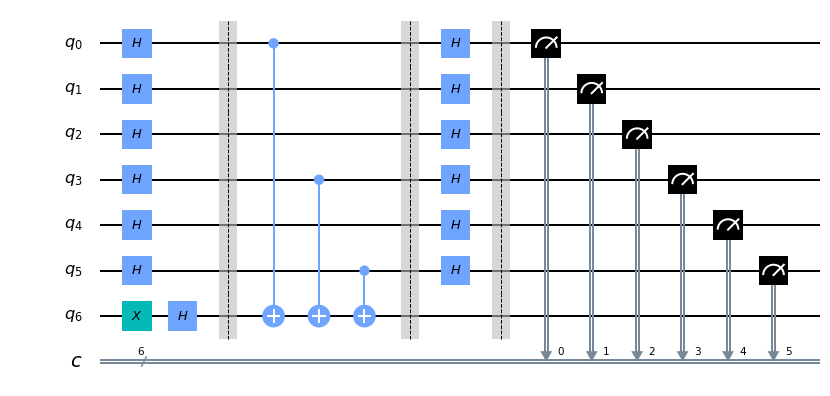

In [17]:
circuit.draw(output = 'mpl')

In [18]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots = 1).result()
count = result.get_counts()
print(count)

{'101001': 1}
